In [1]:
### find breakpoints

In [2]:
import pandas as pd
import pwlf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_composer = pd.read_csv("complexity and accumulation for cakephp_15segments_RMSE.csv")

In [4]:
# Prepare the data for pwlf
x = df_composer['accumulative_raw'].values
y = df_composer['complexity_raw'].values

In [5]:
# Fit piecewise linear model with a chosen number of segments
my_pwlf = pwlf.PiecewiseLinFit(x, y)
num_segments = 30
breakpoints = my_pwlf.fitfast(num_segments)

breakpoints

array([6.85575000e+03, 2.72758913e+05, 7.37112931e+05, 2.00859928e+06,
       2.16859725e+06, 2.66888737e+06, 3.46775271e+06, 3.93333548e+06,
       3.95669080e+06, 4.47350095e+06, 4.71504673e+06, 5.25430825e+06,
       6.48203224e+06, 7.81919478e+06, 7.97529115e+06, 8.34431712e+06,
       8.74712533e+06, 1.07718839e+07, 1.29285497e+07, 1.30301028e+07,
       1.54813118e+07, 1.74469261e+07, 1.88188713e+07, 2.01244481e+07,
       2.07544465e+07, 2.08065043e+07, 2.08104947e+07, 2.12019886e+07,
       2.20974698e+07, 2.21714985e+07, 2.26160971e+07])

In [6]:
my_pwlf.fit_with_breaks(breakpoints)

14727622.128907176

In [7]:
### plot the graph 

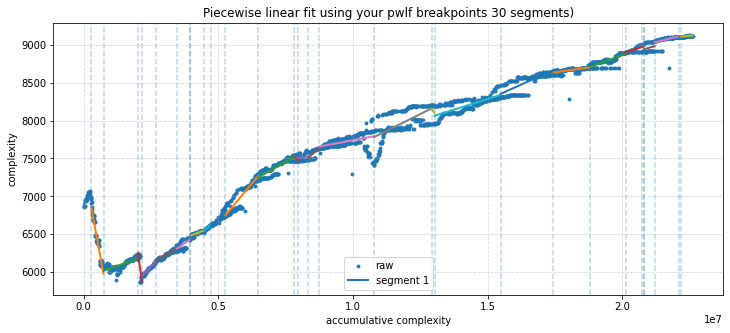

In [8]:
# Plot raw data
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=8, label='raw')

# For each segment, fit a simple linear model on points within breakpoint interval and plot the line
for i in range(len(breakpoints)-1):
    x0, x1 = breakpoints[i], breakpoints[i+1]
    mask = (x >= x0) & (x <= x1)
    if mask.sum() < 2:
        continue
    Xi = x[mask]
    Yi = y[mask]
    X1 = np.vstack([np.ones_like(Xi), Xi]).T
    beta, *_ = np.linalg.lstsq(X1, Yi, rcond=None)
    a, b = beta[0], beta[1]
    xs = np.linspace(Xi.min(), Xi.max(), 200)
    ys = a + b*xs
    plt.plot(xs, ys, linewidth=2, label=f'segment {i+1}' if i==0 else None)

# draw vertical lines at breakpoints (except first & last if out of range)
for bp in breakpoints[1:-1]:
    plt.axvline(bp, linestyle='--', alpha=0.3)

plt.title('Piecewise linear fit using your pwlf breakpoints %s segments)' %(str(num_segments)))
plt.xlabel('accumulative complexity')
plt.ylabel('complexity')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()